In [173]:
from typing import Tuple, List

import numpy as np
import seaborn as sns
from itertools import combinations

from matplotlib import pyplot as plt

In [230]:
def cosine_similarity(matrix1: np.ndarray, matrix2: np.ndarray) -> np.ndarray:
    matrix1_norm = np.linalg.norm(matrix1, axis=1)
    matrix2_norm = np.linalg.norm(matrix2, axis=1)
    matrix_norm = matrix1_norm.reshape(matrix1.shape[0], 1) * matrix2_norm.reshape(1, matrix2.shape[0])
    return (matrix1 @ matrix2.T) / matrix_norm

def element_comb_val(comb: Tuple[int], i: int, j: int, N: int, D: int, betas_opt: np.ndarray, betas: np.ndarray) -> Tuple[float, float]:
    not_comb_j = [idx for idx in range(N) if idx not in comb and idx != j]
    
    LHS = np.concatenate([betas_opt[i, :].reshape(1, D), betas[not_comb_j, :]])
    RHS = np.concatenate([betas[j, :].reshape(1, D), betas[not_comb_j, :]])
    
    #print(f"comb: {comb}", i, j, LHS.shape, RHS.shape, f"comb_i: {i},{not_comb_j}", f"comb_j: {j},{not_comb_j}")
    
    return np.linalg.det(LHS @ RHS.T).item(), cosine_similarity(LHS, RHS).prod().item()
    

def element_wise_val(S: List[int], i: int, j: int, N: int, D: int, betas_opt: np.ndarray, betas: np.ndarray) -> List[float]:
    sum = []
    for k in range(len(S) + 1):
        for comb in combinations(S, k):
            sum.append(element_comb_val(comb, i, j, N, D, betas_opt, betas))
    return sum

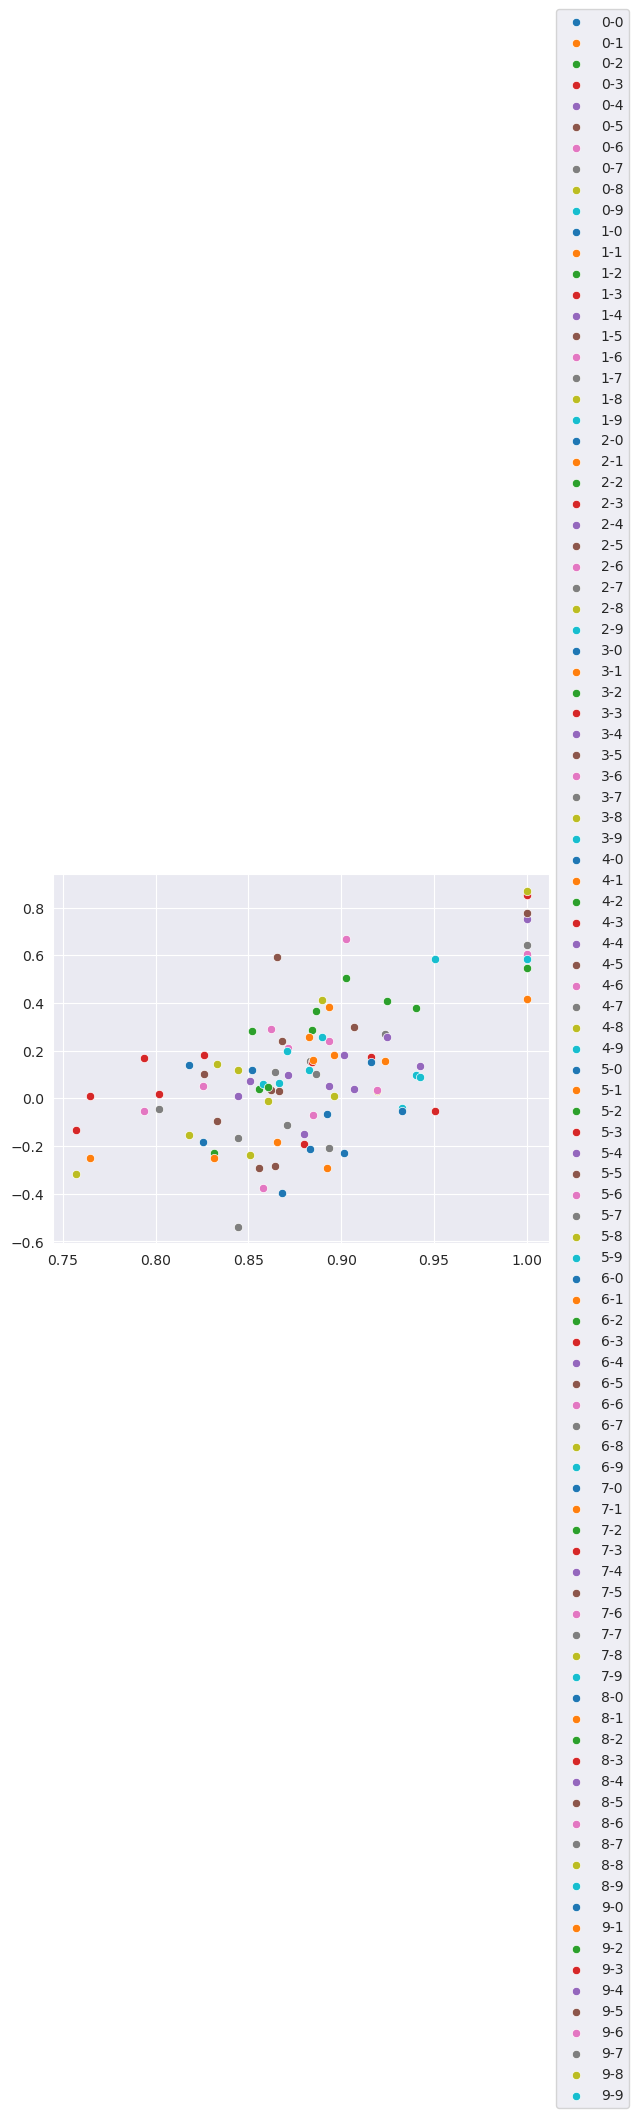

In [231]:
N = 10 # np.random.randint(2, 10)
D = 10 # np.random.randint(1, 100)
betas_opt = np.random.random(size=(N, D))
betas = betas_opt + np.random.random(size=(N, D))

denom = element_wise_val(list(range(N)), -1, -1, N, D, betas, betas)
denom, _ = zip(*denom)
denom = sum(denom)

for i in range(N):
    for j in range(N):
        S = [idx for idx in range(N) if idx != j]
        det_and_sim = element_wise_val(S, i, j, N, D, betas_opt, betas)
        det, sim = zip(*det_and_sim)
        det = [sum(det) / denom]
        
        t = [cosine_similarity(betas[i, :].reshape(1, D), betas[j, :].reshape(1, D)).item()]
        
        sns.scatterplot(x=t, y=det, label=f"{i}-{j}")
        
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))